## Wall Street Bets Web Scraper

We scrape comments from the wallstreetbets subreddit - https://www.reddit.com/r/wallstreetbets/.

We crossreference comments with a list of stocks from exchanges NASDAQ and OTC.

We analyse the frequency of stock occurences aswell as accuracy by plotting a histogram.


In [1]:
import random
import time
import matplotlib as plt

#Use Selenium to scrape data
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
time.sleep(random.random()*5)
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(random.random()*5)
driver.get("https://www.reddit.com/r/wallstreetbets/")

#Find daily discussion link
links = {}
elems = driver.find_elements_by_xpath("//a[@href]")
for i in range(1,len(elems)):
    links[i] = (elems[i].get_attribute("href"),1)

for i in links.values():
    link = i[0]
    link = str(link)
    if "daily_discussion" in link:
        daily_link = link

time.sleep(random.random()*5+1)


#note we throw an exception at the weekend where the 
#title refers to "weekend"
if 'daily_link' in globals():
    #go to the link titled "daily link"
    driver.get(daily_link)
else:
    #In case we can't find the desired link
    print("Need Manual Intervention")
    time.sleep(random.random()*5+5)

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:01<00:00, 4.24MB/s]
C:\Users\kianv\AppData\Local\Temp\ipykernel_22144\1299038854.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\kianv\AppData\Local\Temp\ipykernel_22144\1299038854.py:20: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  elems = driver.find_elements_by_xpath("//a[@href]")


' \ntry:\n    flairs_links = {}\n    elems = driver.find_elements_by_xpath("//a[@href]")\n    for i in range(1,len(elems)):\n        flairs_links[i] = (elems[i].get_attribute("href"),1)\nexcept:\n    pass\n\n\ntry:\n    user_name_links = []\n    for i in user_name_links.values():\n        link = i[0]\n        link = str(link)\n        if "/u/" in link:\n            user_name_links.append(link)\nexcept:\n    pass\n'

Here we load the page, by finding the show more replies button (finding the associated element and then calling the click() function on that 8 times)

In [3]:
try:
    for j in range(1,8):
        i=0
        time.sleep(random.random()*2+5)
        matched_elements = driver.find_elements_by_css_selector("p")
        while 'replies' not in matched_elements[-1-i].text:
            i = i+1
        matched_elements[-1-i].click()
        print("Clicked More replies: " + j + " times")
except:
    pass

C:\Users\kianv\AppData\Local\Temp\ipykernel_22144\3009431208.py:5: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  matched_elements = driver.find_elements_by_css_selector("p")


Now we scour the page for the comment content.

In [38]:
comments_total = ''
#matched_elements = driver.find_elements_by_css_selector("p")
matched_elements = driver.find_elements(By.CSS_SELECTOR,"p")

Save comments to a file

In [39]:
l=0
for matched_element in matched_elements:
    comments_total = comments_total +matched_element.text + ' '

#Concatenate the text and save to a file

from datetime import datetime
filename = 'WSB_'+datetime.today().strftime("%d.%m.%Y")+".txt"
with open(filename, "w",encoding="utf-8") as text_file:
    text_file.write(comments_total)
import shutil

### Text analysis

Now we open the current file and we try to scan it for potential stock candidates

We open the file:

In [40]:
with open(filename,encoding="utf-8") as f:
    lines = f.readlines()
comments = str(lines)

We get rid of the miscellaneous characters such as '#' and '@' by using ascii

In [41]:
for i in comments:
    #Not Lowercase
    if ord(i)> 122 or ord(i)<97:
        #Not Uppercase
        if ord(i)>90 or ord(i)<65:
            #Not space
            if ord(i) != 32:
                comments = comments.replace(i, '')
                #print(i)

We convert the text to a list where each element is a word

In [42]:
comments = comments.split()

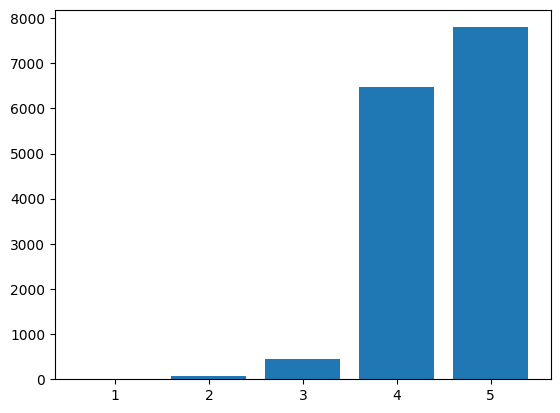

In [65]:
import matplotlib.pyplot as plt
#Compute length of the name of each stock symbol
x = [0 for i in range(len(stock_list))]
j=0
for elem in stock_list:
    x[j] = len(elem)
    j+=1

#count elements
hashmap ={}
for elem in x:
    if elem not in hashmap:
        hashmap[elem] = 1
    else:
        hashmap[elem]+=1

#Plot a bar chart of their lengths
plt.bar(sorted(hashmap.keys()),[hashmap[x] for x in sorted(hashmap.keys())])
plt.show()

We now filter the string to only include words of length between 4 and 5.

In [66]:
for word in list(comments):
    if len(word) <4 or len(word)>5:
        comments.remove(word)

### Check Validity of a word as a stock

Now we get a list of all the symbols in NASDAQ

In [67]:
import pandas as pd
OTC = pd.read_csv('OTC_17.03.2022.csv')
nasdaq = pd.read_csv('NASDAQ_17.03.2022.csv')

nasdaq_stocks = nasdaq['Code'].to_list()
OTC_stocks = OTC['Code'].to_list()
stock_list = nasdaq_stocks + OTC_stocks

Make both lists in lowercase for easier comparison

In [76]:
for i in range(0,len(stock_list)):
    stock_list[i] = stock_list[i].lower()
for i in range(1,len(comments)):
    comments[i] = comments[i].lower()

Check if the stock is indeed a valid symbol by cross referncing.

In [79]:
final_filter=[]
for word in comments:
    if word in stock_list:
        final_filter.append(word)

In [81]:
len(final_filter)

55

<AxesSubplot: >

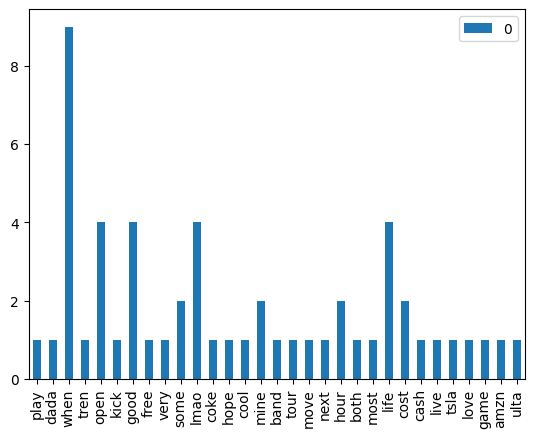

In [82]:
import pandas
from collections import Counter

letter_counts = Counter(final_filter)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

In conclusion, we may need to crossreference the deteced names with volatility of the given stock to improve accuracy of our program.

In [89]:
from better_profanity import profanity
rudewords=[]
for elem in comments:
    if profanity.contains_profanity(elem) == True:
        rudewords.append(elem)